In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [3]:
# Study data files
mouse = "Mouse.csv"
results= "Results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse)
study_results = pd.read_csv(results)
# Combine the data into a single dataset
final_data=pd.merge(mouse_metadata,study_results,on="Mouse ID")
final_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice in the DataFrame.
mice_num=final_data['Mouse ID'].nunique()
mice_num

249

In [5]:
 # Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
final_data[['Mouse ID','Timepoint']].loc[final_data.duplicated()]

,Mouse ID,Timepoint
909,g989,0


In [6]:
 # Optional: Get all the data for the duplicate mouse ID. 
final_data.loc[final_data.duplicated(),:]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. 
clean_df=final_data.drop_duplicates(keep=False)
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
 # Checking the number of mice in the clean DataFrame.
mice_num=clean_df["Mouse ID"].nunique()
mice_num

249

In [10]:
#SUMMARY STATISTICS
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

In [11]:
clean_df[['Drug Regimen','Tumor Volume (mm3)']].head()

,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,45.000000
1,Ramicane,38.825898
2,Ramicane,35.014271
3,Ramicane,34.223992
4,Ramicane,32.997729


In [12]:
summarytable=clean_df[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').agg(["mean","median","var","std","sem"])
summarytable.head()

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

In [13]:
#BAR PLOTS
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 


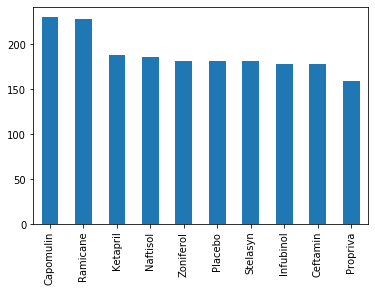

In [14]:
Drug_Mouse_df = clean_df[['Drug Regimen','Mouse ID']]
pd.value_counts(Drug_Mouse_df['Drug Regimen']).plot.bar()


In [15]:
#Bar plot showing the number of mice per timepoint for each treatment throughout the course of the study using pyplot

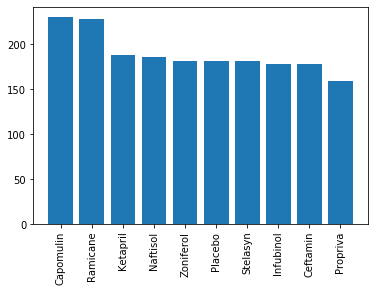

In [16]:
plt.bar(Drug_Mouse_df['Drug Regimen'].value_counts().index.values.tolist(),Drug_Mouse_df['Drug Regimen'].value_counts().values.tolist())
plt.xticks(rotation='vertical')
plt.show()

In [17]:
#PIE PLOTS
#pie plot for female vs male mouse using Pandas

In [18]:
gender=clean_df.groupby(["Sex"])['Mouse ID'].count()
gender

Sex
Female    933
Male      958
Name: Mouse ID, dtype: int64

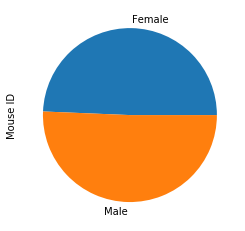

In [19]:
gender.plot.pie()

([<matplotlib.patches.Wedge at 0x1a19169e50>,
 [Text(0.022841723306029415, 1.0997628179186687, 'Female'),
  Text(-0.022841620338803076, -1.0997628200572604, 'Male')],
 [Text(0.01245912180328877, 0.5998706279556374, '49.3%'),
  Text(-0.01245906563934713, -0.599870629122142, '50.7%')])

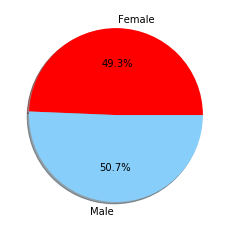

In [20]:
#pie plot for female vs male mouse using Pyplot
labels=["Female","Male"]
sizes=[933,958]
colors=["red","lightskyblue"]
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True)

In [21]:
#QUARTILES,OUTLIERS,BOX PLOTS

In [22]:
#Calculate the final tumor volume of each mouse across 4 of the most promising regimens . Calculate IQR and determine if there are outliers

In [23]:
Finaldata_clean_promising_treatment_regimens = clean_df[clean_df['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])][['Drug Regimen','Tumor Volume (mm3)']]

In [24]:
def get_IQR (column):
    q1 = np.percentile(column, 25)
    q3 = np.percentile(column, 75)
    return q3-q1

In [25]:
Finaldata_clean_promising_treatment_regimens[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').agg([get_IQR])

,Tumor Volume (mm3)
,get_IQR
Drug Regimen,
Capomulin,7.314067
Ceftamin,9.593010
Infubinol,10.002091
Ramicane,8.325365


In [26]:
def find_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    lower_value  = q1-1.5*iqr
    upper_value = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] < lower_value) | (df_in[col_name] > upper_value)]
    return df_out

In [27]:
find_outlier(Finaldata_clean_promising_treatment_regimens,'Tumor Volume (mm3)').sort_values(by = 'Drug Regimen')

,Drug Regimen,Tumor Volume (mm3)
19,Capomulin,23.343598
1032,Ceftamin,66.622836
1033,Ceftamin,68.923185
1112,Ceftamin,67.748662
1670,Ceftamin,67.527482
1845,Ceftamin,68.594745
463,Infubinol,67.973419
540,Infubinol,66.083066
635,Infubinol,67.821420
636,Infubinol,69.428141


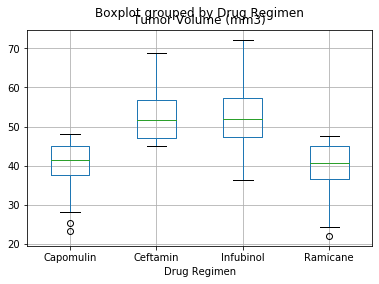

In [28]:
Finaldata_clean_promising_treatment_regimens[['Drug Regimen','Tumor Volume (mm3)']].boxplot(column = ['Tumor Volume (mm3)'],by = 'Drug Regimen')
plt.show()

In [16]:
#LINE and SCATTER PLOTS

In [17]:
#line plot of time point vs tumor vlume for a mouse treated with capomulin


In [30]:
df = clean_df[clean_df['Drug Regimen'] =='Capomulin'][['Weight (g)','Tumor Volume (mm3)']]
df.head()

,Weight (g),Tumor Volume (mm3)
10,17,45.000000
11,17,43.878496
12,17,37.614948
13,17,38.177232
14,17,36.866876


In [31]:
df1 = df.groupby('Weight (g)')['Tumor Volume (mm3)'].mean()
df1.head()

Weight (g)
15    36.182040
17    37.214133
19    41.182391
20    39.141053
21    42.088700
Name: Tumor Volume (mm3), dtype: float64

In [32]:
df1 = df1.reset_index(name = 'Avg')
df1.head()

,Weight (g),Avg
0,15,36.182040
1,17,37.214133
2,19,41.182391
3,20,39.141053
4,21,42.088700


In [34]:

#SCATTER PLOTS

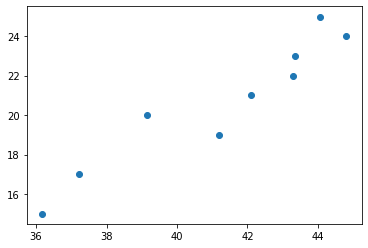

In [35]:
x_axis = df1['Avg'].values
y_axis= df1['Weight (g)'].values
plt.scatter(x_axis, y_axis)
plt.show()

In [36]:
#correlation coeffcient amd linear reg

In [37]:
df1.corr()

,Weight (g),Avg
Weight (g),1.000000,0.950524
Avg,0.950524,1.000000


In [64]:
Correlation coefficient between weight and average is 0.95


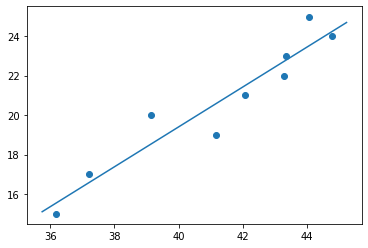

In [38]:
  # Add correlation line on top of scatter plot
plt.scatter(x_axis,y_axis)
axes = plt.gca()
m, b = np.polyfit(x_axis, y_axis, 1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '-')
plt.show()

In [ ]:
#Three observations
1.From the pie plot we can see that distribution of female vs make is almost similar
2.Fromt he outliers table, we can see that there are more outliers for Infubinol and leat number of outliers from Capomulin Regimens
3.From the scatter plot we can see that weight and the average tumor volume are highly correlated